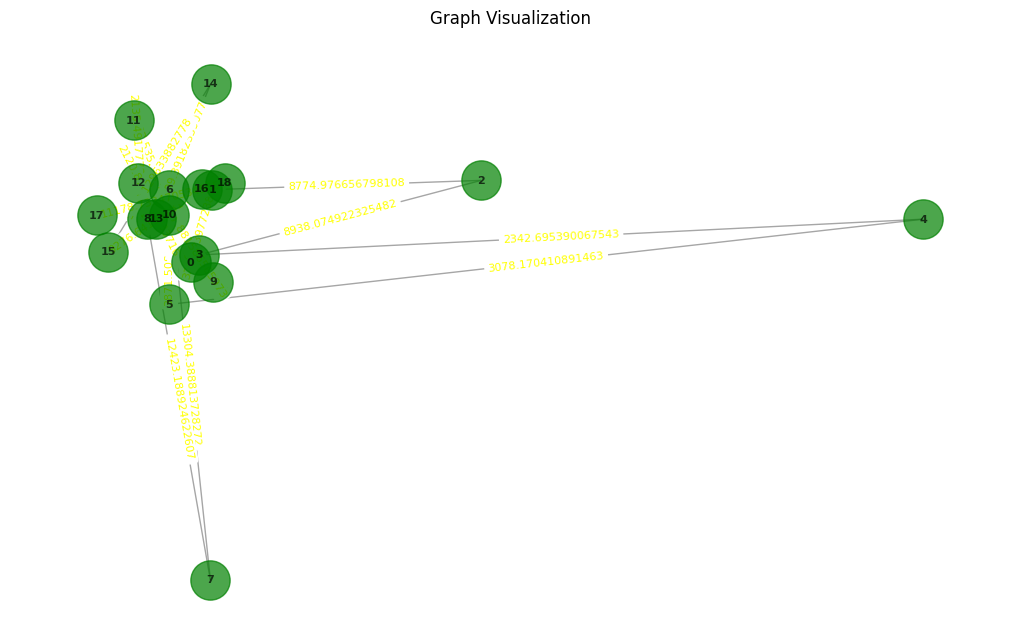


Shortest Path with IDS: [2, 3, 4, 5, 6, 7, 8, 9]
Total Cost: 51153.83 km
Total Time: 0.000026 seconds


In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from geopy.distance import geodesic
import time

def read_data(file_name):
    with open(file_name, 'r') as file:
        data = file.readlines()
    points = [tuple(map(float, line.strip().split(','))) for line in data]
    return points

def create_graph(points):
    G = nx.Graph()
    G.add_nodes_from(range(len(points)))
    for i in range(len(points) - 1):
        distance_km = geodesic(points[i], points[i + 1]).kilometers
        G.add_edge(i, i + 1, weight=distance_km)
    return G

def plot_graph(graph, points):
    pos = {i: (points[i][1], points[i][0]) for i in range(len(points))}
    edge_labels = nx.get_edge_attributes(graph, 'weight')

    plt.figure(figsize=(10, 6))
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=800, node_color='green', font_size=8,
            edge_color='gray', alpha=0.7)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='yellow', font_size=8)
    plt.title("Graph Visualization")
    plt.axis('off')
    plt.show()

def iterative_deepening_search(graph, start, goal):
    for depth in range(1, len(graph.nodes) + 1):
        result, cost, execution_time = depth_limited_search(graph, start, goal, depth)
        if result is not None:
            return result, cost, execution_time

    return None, None, None  

def depth_limited_search(graph, current_node, goal, depth_limit):
    start_time = time.time()
    result, cost = recursive_dls(graph, current_node, goal, depth_limit)
    end_time = time.time()
    return result, cost, end_time - start_time

def recursive_dls(graph, current_node, goal, depth_limit):
    if current_node == goal:
        return [current_node], 0

    if depth_limit == 0:
        return None, None

    for neighbor in graph.neighbors(current_node):
        result, cost = recursive_dls(graph, neighbor, goal, depth_limit - 1)
        if result is not None:
            return [current_node] + result, cost + graph[current_node][neighbor]['weight']

    return None, None

def main():
    file_name = "graph.txt"
    points = read_data(file_name)

    G = create_graph(points)

    plot_graph(G, points)

    start_node = 2
    end_node = 9

    ids_result, ids_cost, ids_execution_time = iterative_deepening_search(G, start_node, end_node)

    print(f"\nShortest Path with IDS: {ids_result}")
    print(f"Total Cost: {ids_cost:.2f} km")
    print(f"Total Time: {ids_execution_time:.6f} seconds")

if __name__ == "__main__":
    main()
